# POSTTEST 8

* Nama  : Ananta Yusra Putra Akmal 
* NIM   : 2109106024
* Kelas : A1 2021

* Dataset = cmaterdb

In [78]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import BatchNormalization

## 1. Klasifikasi data cmaterdb

In [79]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tfds.load(
    "cmaterdb",
    split=["train[:70%]", "train[:30%]"],
    batch_size=-1,
    as_supervised=True,  # Include labels
)

* melihat shape x_train_raw

In [80]:
x_train_raw.shape

TensorShape([3500, 32, 32, 3])

* melihat shape x_test_raw

In [81]:
x_test_raw.shape

TensorShape([1500, 32, 32, 3])

In [82]:
dim = x_train_raw.shape[1] * x_train_raw.shape[2] * x_train_raw.shape[3]
print(dim)

3072


## 2. Training dataset 
* piksel 32x32

In [83]:

training = tf.image.resize(x_train_raw, (32, 32))
testing = tf.image.resize(x_test_raw, (32, 32))

training = np.reshape(training.numpy(), (3500, 3072))
testing = np.reshape(testing.numpy(), (1500, 3072))

## 3.Tampilan DataSet

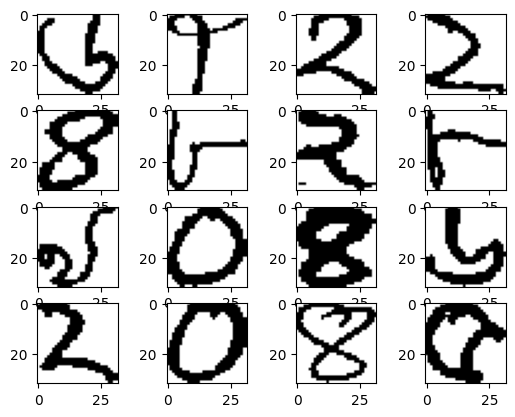

In [84]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train_raw[i])
plt.show()

## 4. Normalisasi piksel pada Gambar

In [85]:
# 255 Total nilai RGB
training = training.astype('float32')/255
testing = testing.astype('float32')/255

## 5. Pembuatan Model DNN

In [86]:
model = Sequential(
    [
        Dense(512, activation='relu', input_dim = 3072 ),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(32,  activation='softmax'),
    ]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               1573376   
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 32)                4128      
                                                                 
Total params: 1,741,728
Trainable params: 1,741,728
Non-trainable params: 0
_________________________________________________________________


## 6. Compile Model DNN

In [87]:
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

## 7. training Model DNN

In [88]:
model.fit(training, y_train_raw, batch_size=32, epochs=10)

Epoch 1/10
110/110 [==============================] - 2s 13ms/step - loss: 1.8578 - accuracy: 0.5154
Epoch 2/10
110/110 [==============================] - 2s 14ms/step - loss: 0.6295 - accuracy: 0.7843
Epoch 3/10
110/110 [==============================] - 2s 14ms/step - loss: 0.4402 - accuracy: 0.8574
Epoch 4/10
110/110 [==============================] - 1s 13ms/step - loss: 0.3651 - accuracy: 0.8789
Epoch 5/10
110/110 [==============================] - 1s 13ms/step - loss: 0.2856 - accuracy: 0.9031
Epoch 6/10
110/110 [==============================] - 1s 14ms/step - loss: 0.2567 - accuracy: 0.9134
Epoch 7/10
110/110 [==============================] - 2s 14ms/step - loss: 0.2120 - accuracy: 0.9280
Epoch 8/10
110/110 [==============================] - 1s 13ms/step - loss: 0.2011 - accuracy: 0.9340
Epoch 9/10
110/110 [==============================] - 1s 13ms/step - loss: 0.1602 - accuracy: 0.9491
Epoch 10/10
110/110 [==============================] - 2s 14ms/step - loss: 0.1573 - accura

## 8. Evaluasi Data 

In [89]:
# BATCH_SIZE = 32
score = model.evaluate(testing, y_test_raw)
print("TEST LOSS     : ", score[0])
print("TEST ACCURACY : ", score[1])

47/47 [==============================] - 0s 2ms/step - loss: 0.1056 - accuracy: 0.9587
TEST LOSS     :  0.10560484975576401
TEST ACCURACY :  0.9586666822433472
